In [ ]:
# Importing the libraries

import keras
from keras.datasets import mnist


from keras.layers import Dense 
from keras.models import Sequential 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Verifying the dataset shape

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [4]:
# Flatten the images

image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [5]:
# Converting to categorical values

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
classes = [str(i) for i in range(10)]

In [7]:
# Creating the model

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Training the model

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=True, validation_split=.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.7935 - accuracy: 0.7887 - val_loss: 0.4466 - val_accuracy: 0.8793
Epoch 2/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.4673 - accuracy: 0.8629 - val_loss: 0.3546 - val_accuracy: 0.8988
Epoch 3/10
54000/54000 [==============================] - 3s 51us/step - loss: 0.4134 - accuracy: 0.8774 - val_loss: 0.3259 - val_accuracy: 0.9075
Epoch 4/10
54000/54000 [==============================] - 3s 51us/step - loss: 0.3927 - accuracy: 0.8838 - val_loss: 0.3249 - val_accuracy: 0.9060
Epoch 5/10
54000/54000 [==============================] - 3s 51us/step - loss: 0.3810 - accuracy: 0.8876 - val_loss: 0.3296 - val_accuracy: 0.9020
Epoch 6/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.3645 - accuracy: 0.8889 - val_loss: 0.3100 - val_accuracy: 0.9048
Epoch 7/10
54000/54000 [==============================] - 3s 52us/st

In [9]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(accuracy)

0.902400016784668


In [10]:
result = model.predict(x_test[0:10])

In [11]:
result[0]

array([2.9779458e-06, 6.0372798e-07, 2.3359513e-05, 2.1857669e-04,
       2.2246860e-07, 6.3775415e-06, 4.7960733e-09, 9.9938953e-01,
       1.3313004e-06, 3.5695551e-04], dtype=float32)

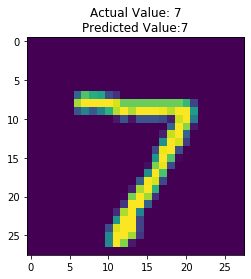

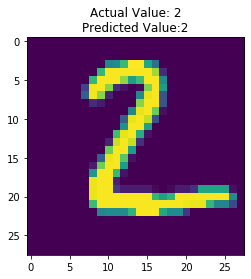

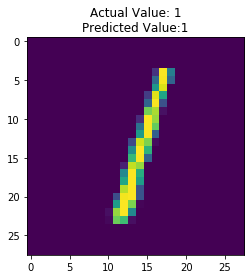

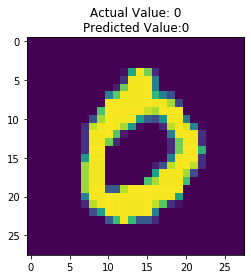

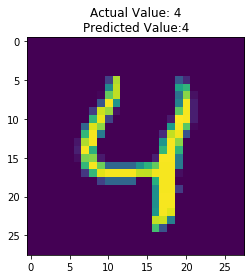

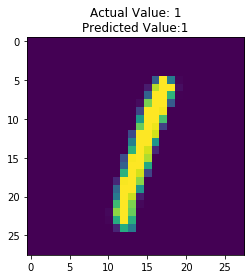

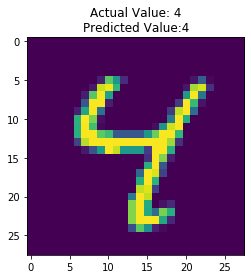

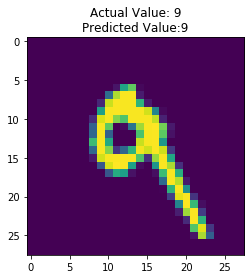

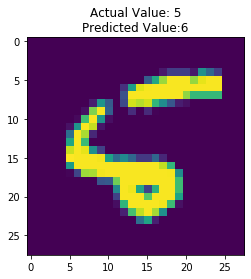

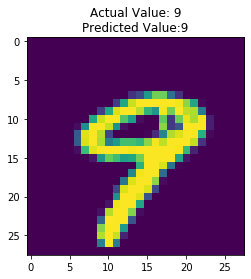

In [12]:
test = x_test[0:10].reshape(10, 28, 28)
for i in range(10):
    plt.figure()
    plt.title("Actual Value: " +  classes[np.argmax(y_test[i])] + "\n" + "Predicted Value:" + classes[np.argmax(result[i])])
    plt.imshow(test[i])